# Tutorial 3: Seasonality

We will explore the seasonality component of NeuralProphet. It allows the model to capture seasonal effects, such as a positive or negative bias for a given day of the week.

In the second tutorial covering Trends, we disabled seasonality. Let us enable the seasonality step by step again, starting with the yearly seasonality. We give it a try and then see what effects it has on the model. We will keep the trend linear with no changepoints for simplicity.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

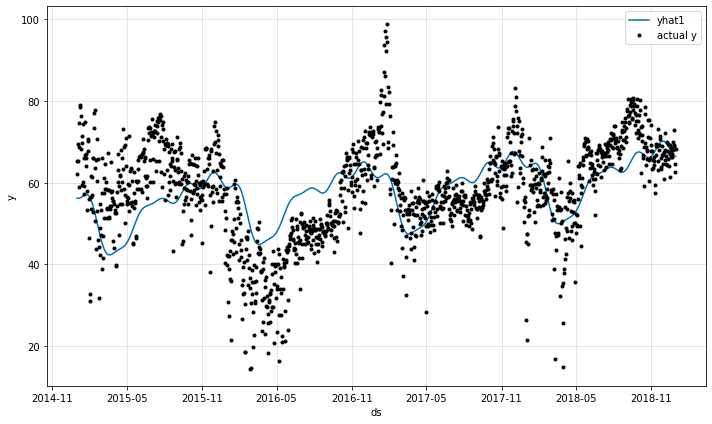

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Model and prediction with yearly seasonality
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Disable seasonality components, except yearly
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

Plotting all components of the forecast we see that the forecast is composed of the trend and the yearly seasonality in an additive way. This means our prediction $\hat{y}$ is the sum of the trend and the seasonality:

$$\text{Prediction}(t) = \hat{y}(t) = \text{Trend}(t) + \text{Seasonality}_{yearly}(t)$$

We can see this more cleary when we plot the trend and the seasonality components separately.

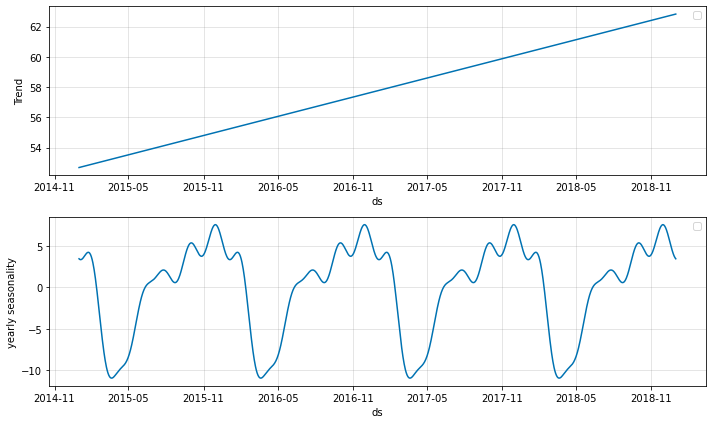

In [3]:
fig = m.plot_components(forecast)

The functions `plot_paramters` and `plot_components` allow you to specify which components to plot. So for the next visualizations we will focus on the seasonality alone (respectively not showing the trend).

An alternative way to visualize the seasonality is to plot the model parameters with `plot_paramters`. In the following visualization the contribution of the seasonality is shown for only one period, here a single year for the yearly seasonality.

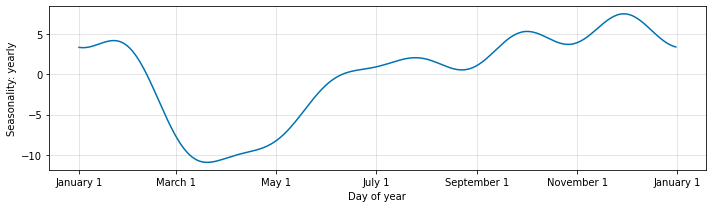

In [4]:
fig = m.plot_parameters(components=["seasonality"])

Seasonality in NeuralProphet is modeled with the help of Fourier terms. You can think of Fourier terms as the sum of multiple sine and cosine functions with different periodicities and magnitudes. This way NeuralProphet can model multiple seasonalities. The seasonality can be of arbitrary periodicities (length), for example a yearly seasonality with daily data ($p = 365.25$) or with weekly data ($p = 52.18$).

You can read more on [Fourier terms on Wikipedia](https://en.wikipedia.org/wiki/Fourier_series) and about the detailed inner workings of seasonality in the [paper on NeuralProphet](https://arxiv.org/abs/2001.04063) under the NeuralProphet model section.

By default, each of the the `yearly`, `weekly` and `daily` seasonalities are automatically enabled if the data is of higher frequency than the respective seasonality and if two full periods of the seasonality are in the training data. For example, `daily` seasonality is automatically enabled if the data is of hourly resolution and at least two full days are recorded.

We continue by manually enabling the `yearly`, `weekly` and `daily` seasonalities and see what that does.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

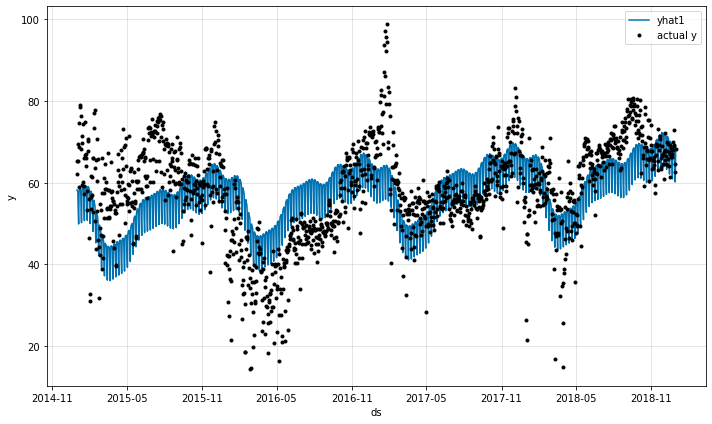

In [5]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

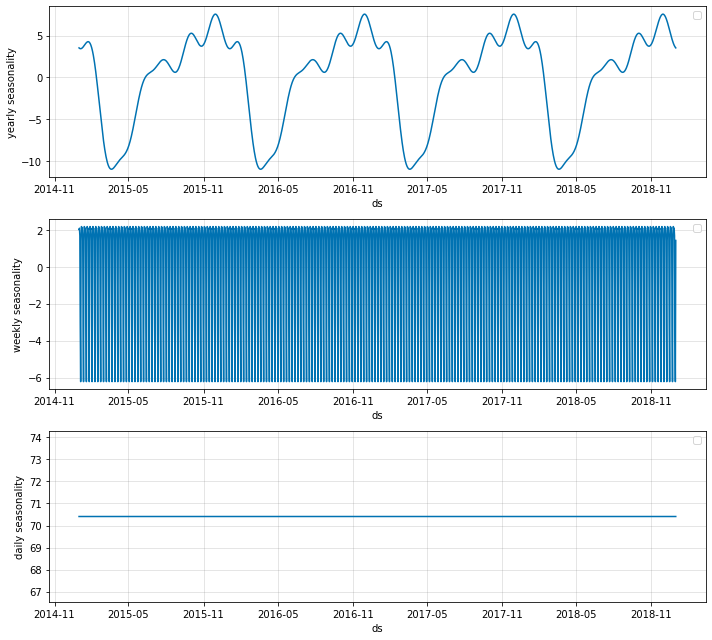

In [6]:
fig = m.plot_components(forecast, components=["seasonality"])

Plotting the three seasonalities, we see a flat line for the daily seasonality. This is expected as the data is daily and thus does not have intra-day differences. 

For the weekly seasonality we can zoom in or plot a single period with `plot_parameters`. 

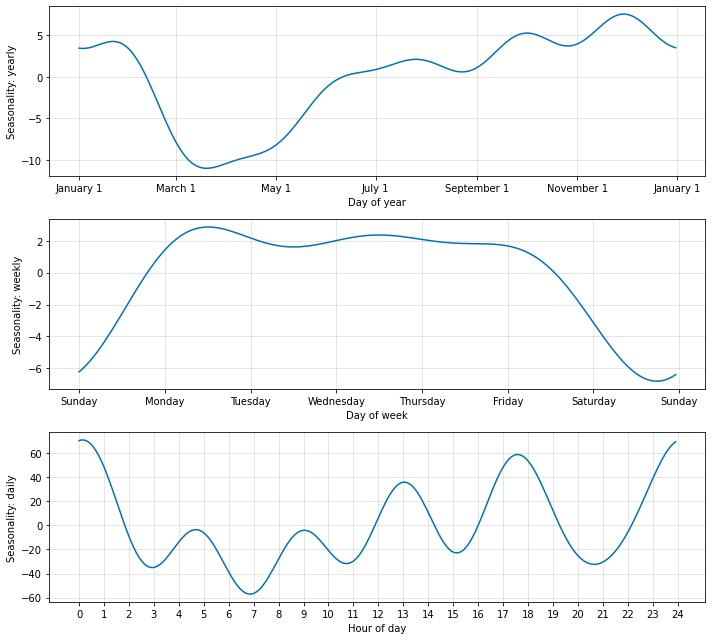

In [10]:
fig = m.plot_parameters(components=["seasonality"])

Note: The pattern for daily seasonality is plain noise, as it has no intra-day data to be fitted on. This is one limitation of the Fourier term approach: Though we are able to fit continuous seasonalities, periods between observation samples may be subject to overfitting. This can be addressed by disabling seasonalities or setting them to a lower number of Fourier terms, reducing their complexity.